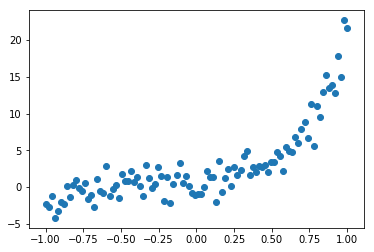

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 40

trX = np.linspace(-1, 1, 100)
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
trY += np.random.randn(*trX.shape) * 1.5
plt.scatter(trX, trY)
plt.show()

[ 0.66687649  1.54573071  4.09670448  4.91981983  3.96168351  5.52276945]


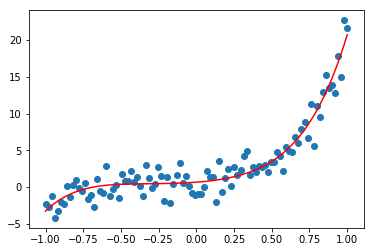

In [20]:
import tensorflow as tf

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append((term))
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)
sess.close()

plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()